In [2]:
import random
import numpy
import matplotlib.pyplot as plt
import joblib

from outlier_cleaner import outlierCleaner


### load up some practice data with outliers in it
ages = joblib.load( open("./practice_outliers_ages.pkl", "rb") )
net_worths = joblib.load( open("./practice_outliers_net_worths.pkl", "rb") )

# C:\ProgramData\anaconda3
# conda install conda-forge::jobliby
# conda install conda-forge::scikit-learn

### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

from sklearn.model_selection import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

In [9]:
### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(ages_train, net_worths_train)


LinearRegression()

In [1]:
print(reg.coef_) 
print(reg.intercept_) 

NameError: name 'reg' is not defined

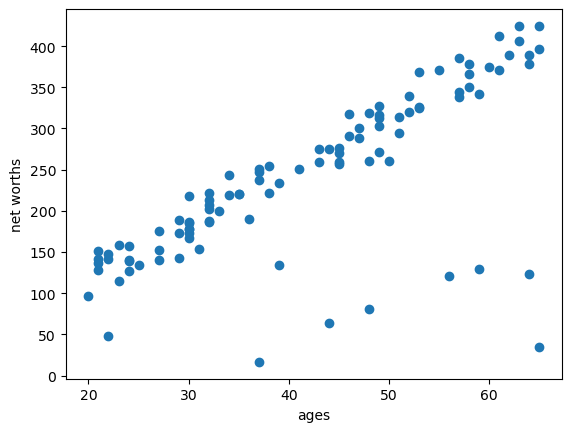

In [7]:
try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.xlabel("ages")
plt.ylabel("net worths")
plt.show()



In [8]:
from sklearn.metrics import mean_squared_error, r2_score
scr = r2_score(net_worths_test, reg.predict(ages_test)) # error score 
print(scr)

NameError: name 'reg' is not defined

In [11]:
### identify and remove the most outlier-y points
import numpy as np
from sklearn.metrics import mean_squared_error

def outlierCleaner(new_worth_predictions, ages_train, net_worths_train):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    
    

    # The mean square error
    # np.mean((new_worth_predictions - net_worths)**2) 
    age_networth_residualerr = []
    

    for i, nwp in enumerate(new_worth_predictions):
        # err = net_worths_train[i] - nwp
        err = nwp - net_worths_train[i]
        age_networth_residualerr.append((ages_train[i], net_worths_train[i],err))
    
    # print(all_error)
    sorted_lists = sorted(age_networth_residualerr, key=lambda x:x[2])
    # print(sorted_lists)
    return sorted_lists[0:81]
    

cleaned_data = []
try:
    new_worth_predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( new_worth_predictions, ages_train, net_worths_train )
    print(len(cleaned_data))
except NameError:
    print("Your regression object doesn't exist, or isn't name reg")
    print("Can't make predictions to use in identifying outliers")

81


slope
[[6.36859481]]
[-6.91861069]


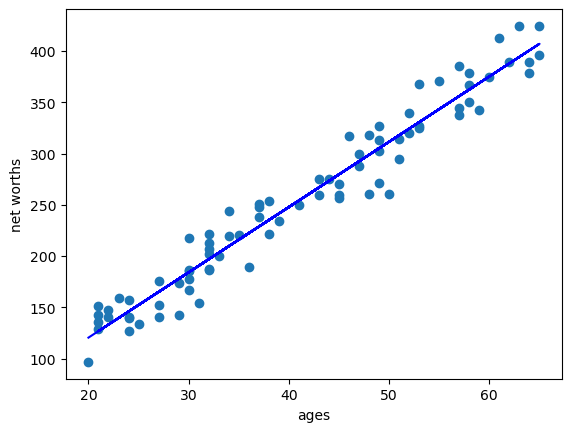

In [12]:

### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
        print("slope")
        print(reg.coef_) 
        print(reg.intercept_) 
    except NameError:
        print("You don't seem to have regression imported/created,")
        print("   or else your regression object isn't named reg")
        print("   either way, only draw the scatter plot of the cleaned data")
    plt.scatter(ages, net_worths)   
    plt.xlabel("ages")
    plt.ylabel("net worths") 
    plt.show()


else:
    print("outlierCleaner() is returning an empty list, no refitting to be done")


In [35]:
# # Explained variance score: 1 is perfect prediction
# # and 0 means that there is no linear relationship
# # between X and y.
from sklearn.metrics import mean_squared_error, r2_score
scr = r2_score(net_worths_test, reg.predict(ages_test)) # error score 
print(scr)

0.9831894553955322
